<a href="https://colab.research.google.com/github/DotBion/improved-octo-sniffle/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
users = pd.read_csv('users.csv')
users_sesh = pd.read_csv('user_sessions.csv')

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users_sesh.head()

,id,userId,sessionTimestamp
0,5d615f62-68c0-4c57-badb-c1d61b42b3d1,bc08a6d5-a5ea-4e7e-aca8-ffd78ae9cd17,2024-06-02 09:14:36.502000+00:00
1,d4846ba9-f860-495a-a54b-dbc957e2bc28,54d68d76-f47a-4dcd-beb2-31022dc03a61,2024-06-05 19:11:52.043000+00:00
2,302230f5-50b9-4fd9-a3ba-c1e7b2fb6d73,26314f5e-ab19-48af-9340-11c94e384843,2024-06-06 22:15:41.096000+00:00
3,47015c7e-e531-4b99-99f4-e1911cd62f33,3d51431e-6ed3-40f1-9a80-8df6374bf7f7,2024-06-09 07:54:30.768000+00:00
4,fb3a1950-8c1c-42ad-9637-1c2d1aecd6de,6b8ab14b-1aa2-488c-8d41-76caae714225,2024-06-09 17:06:58.644000+00:00


In [3]:
users.head()

,id,accountCreationDate,birthDate,campaignSource,zipCodeState,annualIncome,relationship_status,occupation,financial_dependents
0,895d8159-695a-4585-8b57-9fbe484e34c1,2024-09-30 23:53:42.750000+00:00,1972-12-07 00:00:00+00:00,paid_FBIG_MI_GetPaidDebt,Michigan,41000.00,"[""Married""]","[""Employed full-time""]","[""None of the above""]"
1,924c7815-fca1-426e-ac7f-47abc7b741c4,2024-09-30 23:46:47.429000+00:00,2006-08-03 00:00:00+00:00,referral,New York,30000,"[""Single""]","[""Student""]","[""None of the above""]"
2,ef65e573-83de-4b81-91e8-60d18b0df37b,2024-09-30 23:13:29.854000+00:00,1990-09-22 00:00:00+00:00,facebook,Alabama,84500.00,NaN,NaN,NaN
3,915ce1ec-45d7-4bd9-a67d-333eeef242cb,2024-09-30 22:53:28.967000+00:00,1975-03-17 00:00:00+00:00,paid_FBIG_MI_GetPaidDebt,Virginia,10000.00,"[""Single""]","[""Self-employed""]","[""None of the above""]"
4,9b5317d4-ac83-4802-87c7-a77a2c01d8b9,2024-09-30 22:28:05.194000+00:00,1995-04-10 00:00:00+00:00,NaN,Colorado,45000.00,"[""Married""]","[""Student"", ""Freelancer/Gig Economy""]","[""Pets""]"


In [22]:
users["birthDate"] = pd.to_datetime(users["birthDate"], errors="coerce")

# Remove invalid birthdates
users = users[
    users["birthDate"].notna() &
    (users["birthDate"].dt.year > 1920) &
    (users["birthDate"].dt.year < pd.Timestamp.now().year)
]

# Make both datetime objects timezone-naive
users["birthDate"] = users["birthDate"].apply(lambda x: x.tz_localize(None) if x.tzinfo is not None else x)
today = pd.Timestamp.now().tz_localize(None)

# Calculate age
users["age"] = ((today - users["birthDate"]).dt.days // 365)

# Display the result
users[["id", "birthDate", "age"]].head()


,id,birthDate,age
0,895d8159-695a-4585-8b57-9fbe484e34c1,1972-12-07,52
1,924c7815-fca1-426e-ac7f-47abc7b741c4,2006-08-03,18
2,ef65e573-83de-4b81-91e8-60d18b0df37b,1990-09-22,34
3,915ce1ec-45d7-4bd9-a67d-333eeef242cb,1975-03-17,50
4,9b5317d4-ac83-4802-87c7-a77a2c01d8b9,1995-04-10,30


In [25]:
users["accountCreationDate"] = pd.to_datetime(users["accountCreationDate"], errors="coerce")

users["accountCreationDate"].dt.tz

datetime.timezone.utc

In [33]:
# Ensure accountCreationDate is in datetime format and timezone-naive
users["accountCreationDate"] = pd.to_datetime(users["accountCreationDate"], errors="coerce")
users["accountCreationDate"] = users["accountCreationDate"].apply(lambda x: x.tz_localize(None) if x.tzinfo is not None else x)

# Calculate age at account creation
users["debtRealizationAge"] = ((users["accountCreationDate"] - users["birthDate"]).dt.days // 365)

# Show preview
users[["id", "birthDate", "accountCreationDate", "debtRealizationAge"]].head()


,id,birthDate,accountCreationDate,debtRealizationAge
0,895d8159-695a-4585-8b57-9fbe484e34c1,1972-12-07,2024-09-30 23:53:42.750,51.0
1,924c7815-fca1-426e-ac7f-47abc7b741c4,2006-08-03,2024-09-30 23:46:47.429,18.0
2,ef65e573-83de-4b81-91e8-60d18b0df37b,1990-09-22,2024-09-30 23:13:29.854,34.0
3,915ce1ec-45d7-4bd9-a67d-333eeef242cb,1975-03-17,2024-09-30 22:53:28.967,49.0
4,9b5317d4-ac83-4802-87c7-a77a2c01d8b9,1995-04-10,2024-09-30 22:28:05.194,29.0


The typical age users sign up is around 35.19 years.


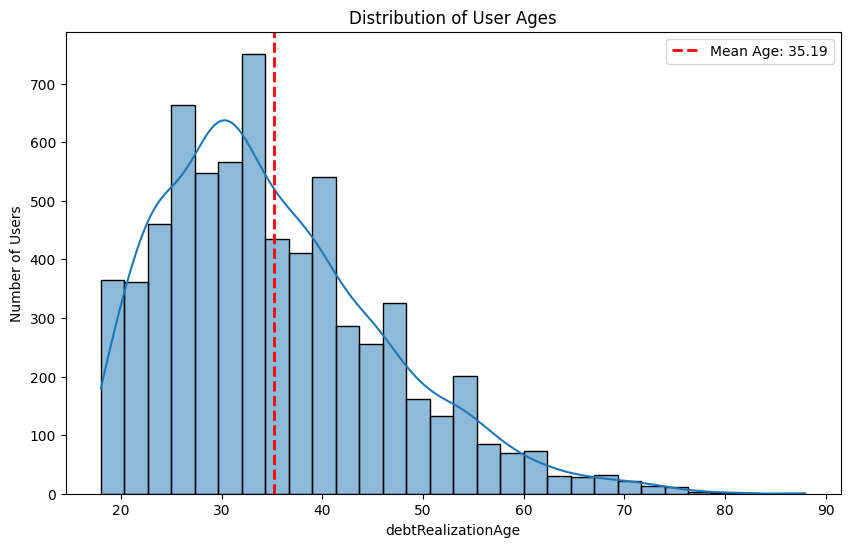


Analysis:
The distribution of user ages reveals the age range during which individuals are most likely to start seeking solutions for debt management.
The typical age at signup, as shown by the mean and the peak of the distribution, indicates the period when debt may become a significant concern or when users become aware of and decide to address their debt.
This could imply that the 'debt realization period' for many users falls within this age range, prompting them to utilize tools like Debbie.


In [44]:
mean_age = users['debtRealizationAge'].mean()
print(f"The typical age users sign up is around {mean_age:.2f} years.")

# Visualize the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(users['debtRealizationAge'], bins=30, kde=True)
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.legend()
plt.title('Distribution of User Ages')
plt.xlabel('debtRealizationAge')
plt.ylabel('Number of Users')
plt.show()

print("\nAnalysis:")
print("The distribution of user ages reveals the age range during which individuals are most likely to start seeking solutions for debt management.")
print("The typical age at signup, as shown by the mean and the peak of the distribution, indicates the period when debt may become a significant concern or when users become aware of and decide to address their debt.")
print("This could imply that the 'debt realization period' for many users falls within this age range, prompting them to utilize tools like Debbie.")